# Example of 3D Earth model plotting and analysis

## Get standard modules

In [8]:
import avni
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.basemap import Basemap

In [2]:
avni.__version__

NameError: name 'avni' is not defined

In [7]:
directory = avni.tools.get_filedir()
filename = 'S362ANI+M.BOX25km_PIX1X1.avni.nc4'
avni.data.update_file(filename)

NameError: name 'avni' is not defined

## Using avni module
#### Load the 3D model in netCDF4 format into a 3D model instance

In [16]:
file = directory+'/'+filename
S362ANIM = avni.models.model3d(file)

Provide rows and colums of subplots - default  is 1 1:0 vs
1 as
2 vsh
3 vsv
4 topo410
5 topo650
6 topoCMB
Select variable to plot - default is 0:Select depth - select any value for topography [24.4-2891.0] :Input two values for minimum and maximum values of colorbar - default is -6.0 6.0:

/opt/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


.... Downloading ridge.json from AVNI server to /home/moulik/.local/lib/python2.7/site-packages/avni/files/ridge.json
.... Download completed.
.... Downloading transform.json from AVNI server to /home/moulik/.local/lib/python2.7/site-packages/avni/files/transform.json
.... Download completed.
.... Downloading trench.json from AVNI server to /home/moulik/.local/lib/python2.7/site-packages/avni/files/trench.json
.... Download completed.
Another figure? y/n:

/home/moulik/.local/lib/python2.7/site-packages/avni/plots.py:305: RuntimeWarning: invalid value encountered in greater
  ind_jump, = np.nonzero(dx > 1000000)


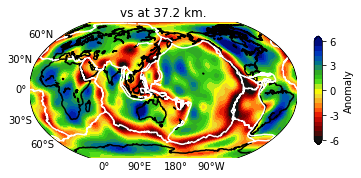

In [14]:
S362ANIM.plotslices()

## Using xarray

In [5]:
import xarray as xr

In [6]:
ds = xr.open_dataset(directory+'/'+filename)

NameError: name 'directory' is not defined

In [19]:
ds?

Type:           Dataset
String form:   
<xarray.Dataset>
           Dimensions:    (depth: 115, latitude: 180, longitude: 360)
           Coordinates:
           * dept <...> in:       24.4
           creator_url:                   avni.org
           geospatial_vertical_units:     km
Length:         7
File:           /opt/anaconda2/lib/python2.7/site-packages/xarray/core/dataset.py
Docstring:     
A multi-dimensional, in memory, array database.

A dataset resembles an in-memory representation of a NetCDF file, and
consists of variables, coordinates and attributes which together form a
self describing dataset.

Dataset implements the mapping interface with keys given by variable names
and values given by DataArray objects for each variable name.

One dimensional variables with name equal to their dimension are index
coordinates used for label based indexing.
Init docstring:
To load data from a file or file-like object, use the `open_dataset`
function.

Parameters
----------
data_vars :

In [7]:
vs = ds['vs']

In [8]:
vs?

Type:           DataArray
String form:   
<xarray.DataArray 'vs' (depth: 115, latitude: 180, longitude: 360)>
           [7452000 values with dtype=fl <...> 6111 4464.00003694 44...
           folder:       vs
           type:         heterogeneity
           unit:         %
Length:         115
File:           /opt/anaconda2/lib/python2.7/site-packages/xarray/core/dataarray.py
Docstring:     
N-dimensional array with labeled coordinates and dimensions.

DataArray provides a wrapper around numpy ndarrays that uses labeled
dimensions and coordinates to support metadata aware operations. The API is
similar to that for the pandas Series or DataFrame, but DataArray objects
can have any number of dimensions, and their contents have fixed data
types.

Additional features over raw numpy arrays:

- Apply operations over dimensions by name: ``x.sum('time')``.
- Select or assign values by integer location (like numpy): ``x[:10]``
  or by label (like pandas): ``x.loc['2014-01-01']`` or
  ``x.sel(t

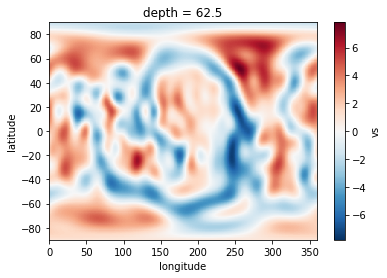

In [9]:
vs[1].plot()

In [20]:
topo650 = ds['topo650']

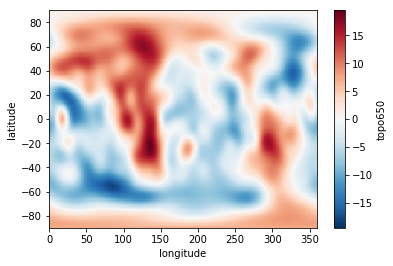

In [21]:
topo650.plot()

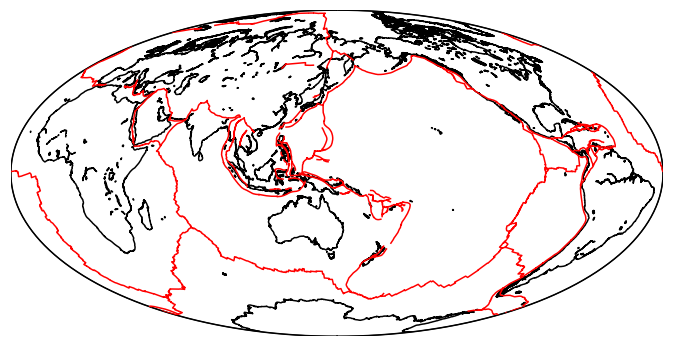

In [11]:
    # defaults
    grid=[30.,90.]
    parallels = np.arange(-90.,90.,grid[0])
    meridians = np.arange(-180.,180.,grid[1])

    projection='robin'
    figuresize=[12,6]
    resolution='l'
    gridwidth=0
    dbs_path = avni.tools.get_filedir()

    fig = plt.figure(1, figsize=(figuresize[0],figuresize[1]))
    gs = gridspec.GridSpec(1, 1)
    gs.update(hspace=0.02) # set the spacing between axes. 
    fig.patch.set_facecolor('white')
    ax=plt.subplot(gs[0])
    m = Basemap(ax=ax,projection='hammer', lon_0=150, resolution=resolution)
    #clip_path = m.drawmapboundary()
    m.drawcoastlines(linewidth=1.5)
    # draw parallels and meridians.
    # label parallels on right and top
    # meridians on bottom and left
    # labels = [left,right,top,bottom]
    if not(m.projection  == 'hammer' and gridwidth == 0):
        m.drawparallels(parallels,labels=[True,False,False,False],linewidth=gridwidth)
        m.drawmeridians(meridians,labels=[False,False,False,True],linewidth=gridwidth)

    # Get the color map
    cpalette = avni.plots.initializecolor('avni')

    #### 
    
    #################################################################
    # add plates and hotspots
    dbs_path=avni.tools.get_fullpath(dbs_path)
    avni.plots.plot_plates(m, dbs_path=dbs_path, color='r', linewidth=1.5)
    m.drawmapboundary(linewidth=1.5)
    #avni.plots.plot_hotspots(m, dbs_path=dbs_path, s=30, color='m', edgecolor='k')

